In [76]:
import numpy as np 
import sys,os
import cv2
import matplotlib.pyplot as plt
import argparse
import pandas as pd
from utils import *
import random


In [96]:
root_dir = "/home/sebasmos/Documentos/NASA_Spacesuit/train/"
# Load data paths
training_images = []   # images png + jpg
img_ann = []        # images annotations
    
videos = []         # videos
videos_ann = []     # videos annotations
video_frames = []   # video frames
video_frames_ann=[] # video frames annotations

for root, dirs, files in os.walk(root_dir, topdown=True):
    for name in files:
        path = os.path.join(root, name)            
        if '.png' in path  and 'images' in path:
            training_images.append(path)
            print(path)
        if '.jpg' in path  and 'images' in path:
            training_images.append(path)
        if '.txt' in path and 'images' in path:
            img_ann.append(path)
        if '.mov' in path and 'videos' in path:
            videos.append(path)
        if '.csv' in path and 'videos' in path:
            videos_ann.append(path)
        if '.jpg' in path and 'videos-frames' in path:
            video_frames.append(path)
            #if '.csv' in path and 'videos-frames' in path: #TODO: CHECK ANNOTATIONS
            #    video_frames_ann.append(path)
print('Image training instances: ', len(training_images))
print('videos training instances: ', len(videos))
print('video_frames evaluation instances: ', len(video_frames))


/home/sebasmos/Documentos/NASA_Spacesuit/train/images/969689.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/409779.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/969698.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/526920.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/049349.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/950880.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/336825.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/591443.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/988860.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/198464.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/530935.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/759158.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/140435.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/394854.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/775588.png
/home/sebasmos/Documentos

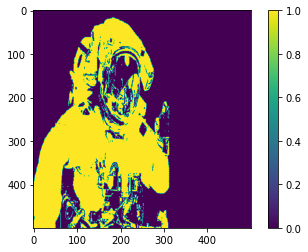

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

In [101]:
def segmentation(path, label):

    IMG_SIZE = 500
    image = cv2.imread(path)
    #image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    mask = np.zeros(image.shape[:2], np.uint8)
    backgroundModel = np.zeros((1, 65), np.float64)
    foregroundModel = np.zeros((1, 65), np.float64)
    rectangle = (0, 0, 500, image.shape[1])
    cv2.grabCut(image, mask, rectangle,  
                backgroundModel, foregroundModel,
                3, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
   
    # The final mask is multiplied with 
    # the input image to give the segmented image.
    
    image = image * mask2[:, :, np.newaxis]

    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    # output segmented image with colorbar
    
    rows,cols = image.shape

    # Create mask
    mask = image.copy()

    for i in range(rows):
        for j in range(cols):
            k = image[i,j]
            if k > 100:
                mask[i,j] = 1
            else:
                mask[i,j] = 0
    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))

    plt.imshow(mask)
    plt.colorbar()
    plt.show()
    '''
    cv2.imwrite('/home/sebasmos/Documentos/NASA_Spacesuit/NASA_SpatiumAESS/Training_code/code/image.jpg',image)
    '''
    return mask
# Fast testing bef assignmt
path = "/home/sebasmos/Documentos/NASA_Spacesuit/train/images/933760.jpg"
segmentation(path, 1)

    1/86...


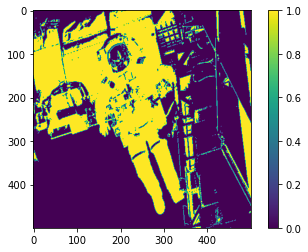

length feat:  ()
size:  0.363064


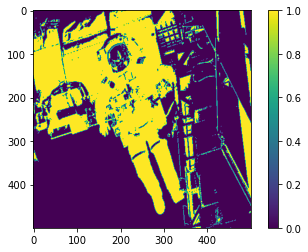

length feat:  ()
    2/86...


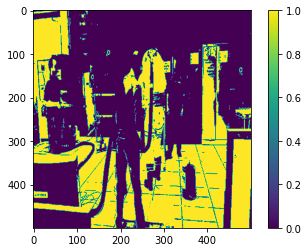

length feat:  ()
size:  0.383916


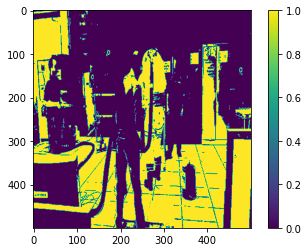

length feat:  ()
    3/86...


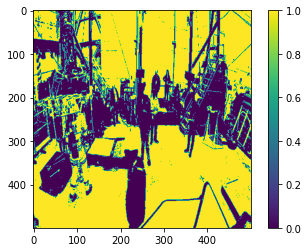

length feat:  ()
size:  0.631564


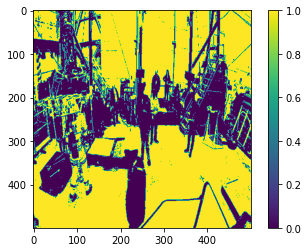

length feat:  ()
    4/86...


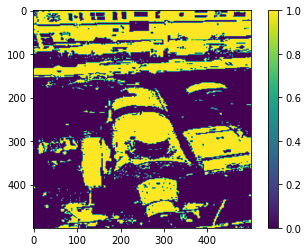

length feat:  ()
size:  0.39438


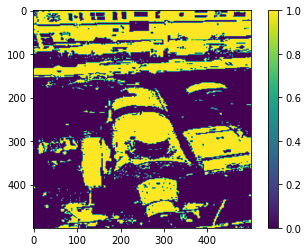

length feat:  ()
    5/86...


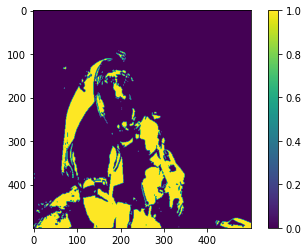

length feat:  ()
size:  0.147008


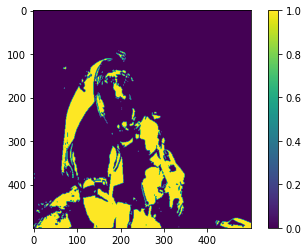

length feat:  ()
    6/86...


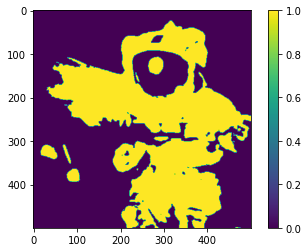

length feat:  ()
size:  0.387152


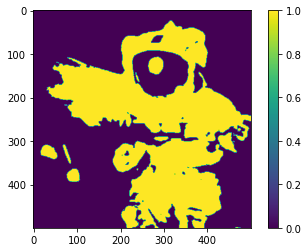

length feat:  ()
    7/86...


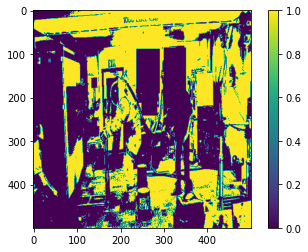

length feat:  ()
size:  0.45242


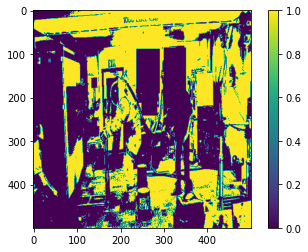

length feat:  ()
    8/86...


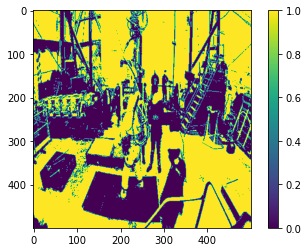

length feat:  ()
size:  0.586292


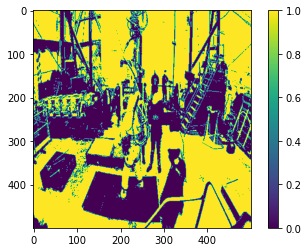

length feat:  ()
    9/86...


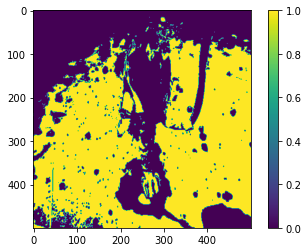

length feat:  ()
size:  0.565964


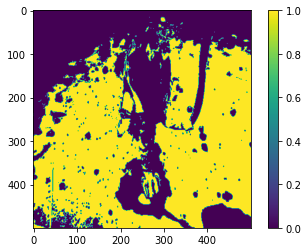

length feat:  ()
    10/86...


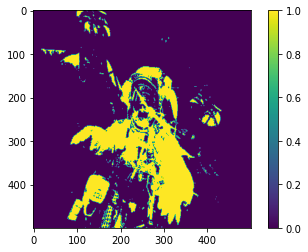

length feat:  ()
size:  0.179392


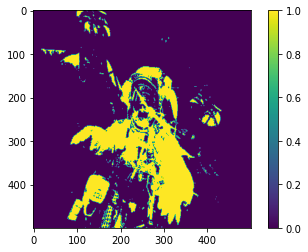

length feat:  ()
    11/86...


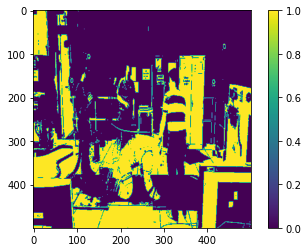

length feat:  ()
size:  0.332876


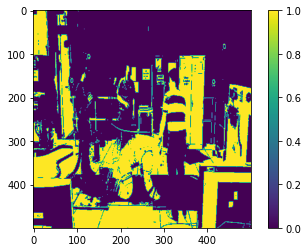

length feat:  ()
    12/86...


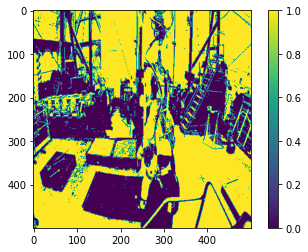

length feat:  ()
size:  0.581768


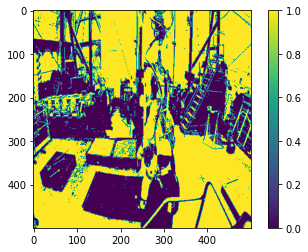

length feat:  ()
    13/86...


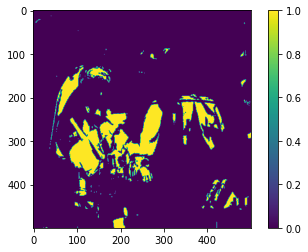

length feat:  ()
size:  0.1049


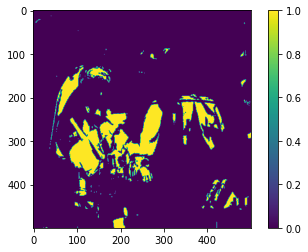

length feat:  ()
    14/86...


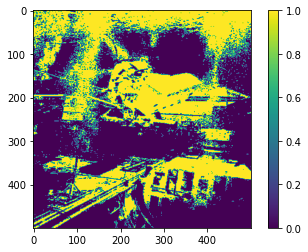

length feat:  ()
size:  0.417484


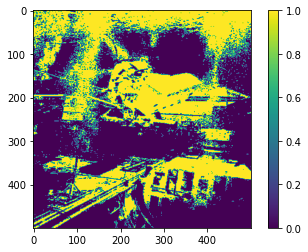

length feat:  ()
    15/86...


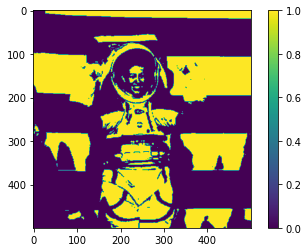

length feat:  ()
size:  0.3785


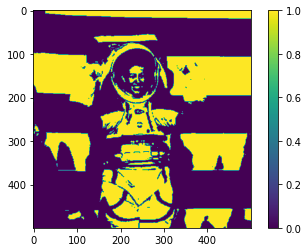

length feat:  ()
    16/86...


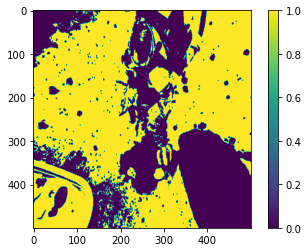

length feat:  ()
size:  0.611404


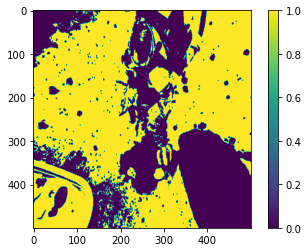

length feat:  ()
    17/86...


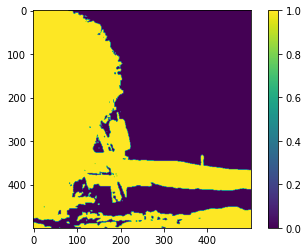

length feat:  ()
size:  0.455568


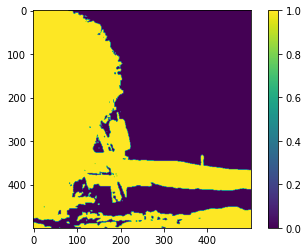

length feat:  ()
    18/86...


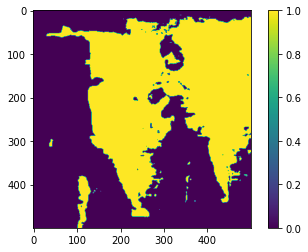

length feat:  ()
size:  0.4488


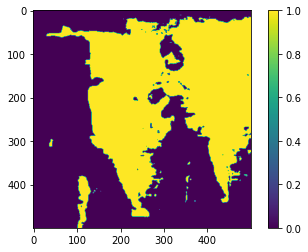

length feat:  ()
    19/86...


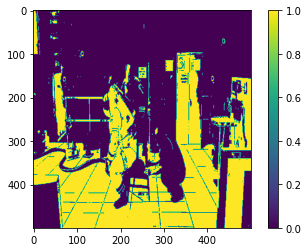

length feat:  ()
size:  0.37514


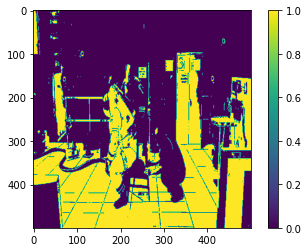

length feat:  ()
    20/86...


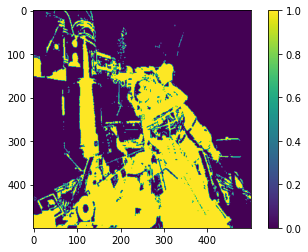

length feat:  ()
size:  0.361888


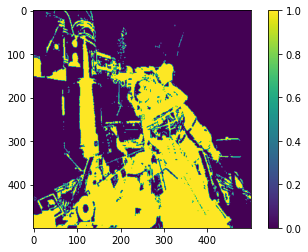

length feat:  ()
    21/86...


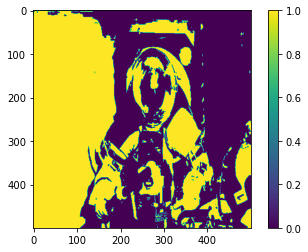

length feat:  ()
size:  0.507016


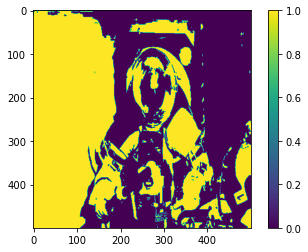

length feat:  ()
    22/86...


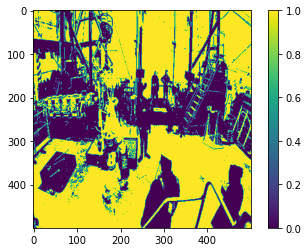

length feat:  ()
size:  0.59538


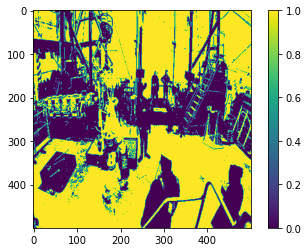

length feat:  ()
    23/86...


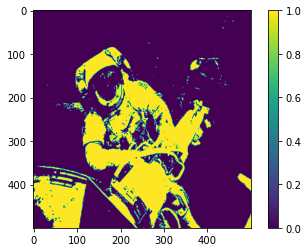

length feat:  ()
size:  0.253412


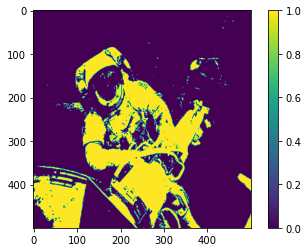

length feat:  ()
    24/86...


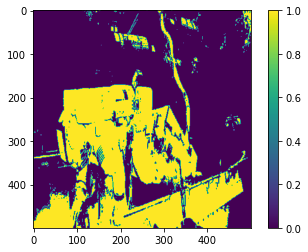

length feat:  ()
size:  0.35466


KeyboardInterrupt: 

In [97]:
i = 0
# Training with images 
Num_features = 1
feat_names = ['Polygon'] # TODO: EXTRACT TRIPLETS HERE!
train_size = len(training_images)

data_train = np.zeros((train_size, Num_features+1), dtype=np.float32)
#data_test = np.zeros((test_size, Num_features+1), dtype=np.float32)
for path in training_images:
    print('    {}/{}...'.format(i+1, len(training_images)))
    print("size: ", feature_extraction(path, 2))
    data_train[i, :] = feature_extraction(path, 2)
    i = i+1


Store Features (joint coordinates, areas, polygons) to csv

In [ ]:
train_size = len(training_images)
print("training data: ", train_size)
train_pd = pd.read_csv("/home/sebasmos/Documentos/NASA_Spacesuit/NASA_SpatiumAESS/Training_code/code/src/sample/submission/training_images.csv")

Num_suits = 1 # TO UPDATE ACCORDING TO IMAGE
Triplets = 15 #
aux = Num_suits*Triplets
#joints = np.zeros((train_size, Num_suits*Triplets))

#train ? 
id_images = []
aux = len(path) - 10
for path in training_images:
    id_images.append(path[aux:len(path)])


def gen_array():
    x_f = []
    y_f = []
    v_f = []

    for i in range(15):
        x_f.append(int (random.uniform(100,999)))
        y_f.append(int (random.uniform(100,999)))
        v_f.append(int (random.uniform(0,3)))

    return x_f,y_f,v_f


def gen_geometries():
    x_f = []
    y_f = []
    type = 0
    if type == 0: #rectangular then 8 var, 4 corners
        for i in range(4):
            x_f.append(int (random.uniform(100,999)))
            y_f.append(int (random.uniform(100,999)))
    elif type==1: # 3 corners
        print("triangular")
    else:
        print("no figure detected")
    return x_f,y_f

def generar_csv (imag,coo,polig):

   f=open('../../../../solution/solution.csv','w')

   for l in range (len(imag)):
      
      f.write(str(imag[l])+','+str(coo[l])+','+str(polig[l])+'\n')

   f.close()

joints_id = []
geom = []

for id, j in enumerate(training_images):

    for i in range(Num_suits):
            #print(" es multiplo de 3")
            x_f,y_f,v_f = gen_array()
            joints_id.append(x_f + y_f + v_f)
            x_geom, y_geom = gen_geometries()
            geom.append(x_geom + y_geom)
            
print("id_images: ",train_size)
print("joints_id: ",len(joints_id))
print("geom: ",len(geom))

generar_csv (id_images,joints_id,geom)





In [81]:
Triplets extraction with synthetic data: testing idea

id_images:  86
joints_id:  86
geom:  86
